In [2]:
import urllib.request
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop

In [3]:
# 파일 가져오기. 지정된 training_dir 디렉토리에 압축 풀기
# 해당 디렉토리는 말과 사람 이미지를 담은 서브 디렉토리를 포함
url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
file_name = "hourse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, "r")
zip_ref.extractall(training_dir)
zip_ref.close()

In [4]:
# 이미지 정제, 객체 생성 
# Generate batches of tensor image data with real-time data augmentation.
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (300, 300),
    class_mode = "binary"
)

Found 1027 images belonging to 2 classes.


In [5]:
model = tf.keras.models.Sequential([
    # 필터 16개를 사용하고 입력 이미지의 크기는 300, 300, 3 
    # 필터는 합성곱 개념을 생각하면된다. 16가지의 필터.
    # 이미지 크기의 맨 마지막 3은 RGB임으로 3
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                           input_shape=(300, 300, 3)), 
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # 이진 분류임으로 sigmoid 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
# 데이터셋 디렉토리에서 가져오기 (전처리 기능은 포함되어 있지 않다.)
train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    image_size = (300, 300),
    label_mode = 'binary'
)

Found 1027 files belonging to 2 classes.


In [7]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [8]:
model.fit(train_ds, epochs=15)

Epoch 1/15
33/33 [==============================] - 15s 126ms/step - loss: 4.2262 - accuracy: 0.7468
Epoch 2/15
33/33 [==============================] - 5s 116ms/step - loss: 0.2379 - accuracy: 0.9036
Epoch 3/15
33/33 [==============================] - 5s 120ms/step - loss: 1.1758 - accuracy: 0.8958
Epoch 4/15
33/33 [==============================] - 5s 117ms/step - loss: 0.5647 - accuracy: 0.9143
Epoch 5/15
33/33 [==============================] - 6s 138ms/step - loss: 0.2707 - accuracy: 0.9513
Epoch 6/15
33/33 [==============================] - 5s 115ms/step - loss: 0.0526 - accuracy: 0.9796
Epoch 7/15
33/33 [==============================] - 5s 117ms/step - loss: 1.8027e-04 - accuracy: 1.0000
Epoch 8/15
33/33 [==============================] - 5s 116ms/step - loss: 0.7509 - accuracy: 0.9241
Epoch 9/15
33/33 [==============================] - 5s 116ms/step - loss: 0.1264 - accuracy: 0.9864
Epoch 10/15
33/33 [==============================] - 5s 115ms/step - loss: 0.0893 - accuracy: 0

# 검증세트 추가

In [9]:
validation_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"

validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [10]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [11]:
model.fit(train_generator,
          epochs=15,
          validation_data=validation_generator)

Epoch 1/15
33/33 [==============================] - 9s 257ms/step - loss: 0.1712 - accuracy: 0.9508 - val_loss: 0.7244 - val_accuracy: 0.8711
Epoch 2/15
33/33 [==============================] - 8s 253ms/step - loss: 0.1709 - accuracy: 0.9602 - val_loss: 2.1795 - val_accuracy: 0.7070
Epoch 3/15
33/33 [==============================] - 8s 253ms/step - loss: 0.0224 - accuracy: 0.9953 - val_loss: 2.3911 - val_accuracy: 0.8008
Epoch 4/15
33/33 [==============================] - 8s 246ms/step - loss: 0.1819 - accuracy: 0.9811 - val_loss: 1.8841 - val_accuracy: 0.8164
Epoch 5/15
33/33 [==============================] - 8s 246ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 2.6156 - val_accuracy: 0.8359
Epoch 6/15
33/33 [==============================] - 8s 242ms/step - loss: 0.1096 - accuracy: 0.9811 - val_loss: 1.6035 - val_accuracy: 0.8398
Epoch 7/15
33/33 [==============================] - 8s 241ms/step - loss: 5.5997e-04 - accuracy: 1.0000 - val_loss: 2.9265 - val_accuracy: 0.8359
Ep

In [12]:
import sys

# 코랩을 사용중인지 확인합니다.
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    sample_images = ['/content/' + fn for fn in uploaded.keys()]

    # 업로드된 파일이 없으면 깃허브에서 다운로드합니다.
    if len(uploaded) < 1:
        import gdown
        base_url = 'https://github.com/rickiepark/aiml4coders/raw/main/ch03/'
        for i in range(1,4):
            gdown.download(base_url + 'hh_image_{}.jpg'.format(i))
        sample_images = ['/content/hh_image_{}.jpg'.format(i) for i in range(1,4)]

# 로컬 컴퓨터면 ch03 폴더에 있는 이미지를 사용합니다.
else:
    sample_images = ['hh_image_{}.jpg'.format(i) for i in range(1,4)]

Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/hh_image_1.jpg
To: /content/hh_image_1.jpg
100%|██████████| 97.4k/97.4k [00:00<00:00, 7.07MB/s]
Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/hh_image_2.jpg
To: /content/hh_image_2.jpg
100%|██████████| 260k/260k [00:00<00:00, 10.6MB/s]
Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/hh_image_3.jpg
To: /content/hh_image_3.jpg
100%|██████████| 61.4k/61.4k [00:00<00:00, 11.3MB/s]


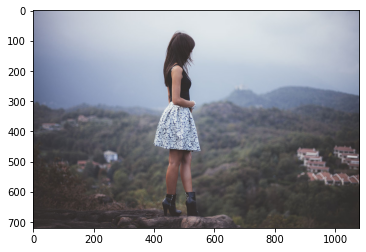

1/1 [==============================] - 0s 277ms/step
모델 출력: 1.0
/content/hh_image_1.jpg는 사람입니다.
--------------------


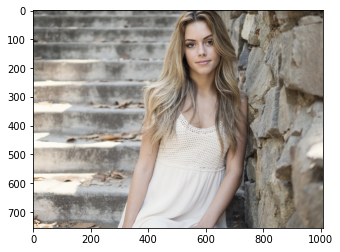

1/1 [==============================] - 0s 16ms/step
모델 출력: 0.0
/content/hh_image_2.jpg는 말입니다.
--------------------


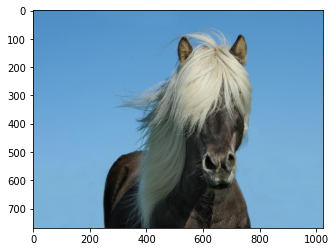

1/1 [==============================] - 0s 21ms/step
모델 출력: 0.0
/content/hh_image_3.jpg는 말입니다.
--------------------


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras.utils as image

for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = image.load_img(fn, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    print('모델 출력:', classes[0][0])
    if classes[0][0] > 0.5:
        print(fn + "는 사람입니다.")
    else:
        print(fn + "는 말입니다.")
    print('--------------------')

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [18]:
model.fit(train_generator,
          epochs=15,
          validation_data=validation_generator)

Epoch 1/15
33/33 [==============================] - 29s 837ms/step - loss: 0.6649 - accuracy: 0.5725 - val_loss: 2.0496 - val_accuracy: 0.5312
Epoch 2/15
33/33 [==============================] - 29s 855ms/step - loss: 0.6005 - accuracy: 0.7205 - val_loss: 1.7702 - val_accuracy: 0.5352
Epoch 3/15
33/33 [==============================] - 25s 754ms/step - loss: 0.4848 - accuracy: 0.7692 - val_loss: 1.5752 - val_accuracy: 0.5234
Epoch 4/15
33/33 [==============================] - 24s 733ms/step - loss: 0.4294 - accuracy: 0.8082 - val_loss: 1.7324 - val_accuracy: 0.5547
Epoch 5/15
33/33 [==============================] - 25s 758ms/step - loss: 0.3743 - accuracy: 0.8393 - val_loss: 1.1164 - val_accuracy: 0.6250
Epoch 6/15
33/33 [==============================] - 25s 754ms/step - loss: 0.3532 - accuracy: 0.8695 - val_loss: 1.4148 - val_accuracy: 0.6562
Epoch 7/15
33/33 [==============================] - 24s 730ms/step - loss: 0.2254 - accuracy: 0.9124 - val_loss: 0.7137 - val_accuracy: 0.7656

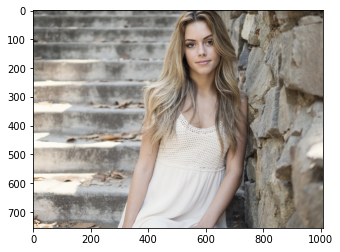

1/1 [==============================] - 0s 81ms/step
모델 출력: 1.0
/content/hh_image_2.jpg는 사람입니다.


In [19]:
fn = sample_images[1]
plt.imshow(mpimg.imread(fn))
plt.show()

# 이미지 불러오기
img = image.load_img(fn, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)

print('모델 출력:', classes[0][0])
if classes[0][0] > 0.5:
    print(fn + "는 사람입니다.")
else:
    print(fn + "는 말입니다.")

# 전이 학습

In [20]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)
pre_trained_model.load_weights(weights_file)

In [21]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_10[0][0]']              
 alization)                                                                                       
                                                                                       

In [22]:
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('마지막 층의 출력 크기: ', last_layer.output_shape)
last_output = last_layer.output

마지막 층의 출력 크기:  (None, 7, 7, 768)


In [23]:
# 출력을 펼쳐서 1차원으로 만듭니다.
x = layers.Flatten()(last_output)
# 1,204개 은닉 유닛과 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
x = layers.Dense(1024, activation='relu')(x)
# 분류를 위해 시그모이드 함수를 사용하는 최종 층을 추가합니다.
x = layers.Dense(1, activation='sigmoid')(x)

In [25]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [27]:
with tf.device('/device:GPU:0'):
  model = Model(pre_trained_model.input, x)

  model.compile(optimizer=RMSprop(learning_rate=0.0001),
                loss='binary_crossentropy',
                metrics=['acc'])

  model.fit(train_generator,
            epochs=40,
            validation_data=validation_generator)

Epoch 1/40
52/52 [==============================] - 17s 263ms/step - loss: 8.4625e-04 - acc: 0.9990 - val_loss: 0.0406 - val_acc: 0.9961
Epoch 2/40
52/52 [==============================] - 11s 220ms/step - loss: 9.8350e-04 - acc: 0.9990 - val_loss: 6.8356e-05 - val_acc: 1.0000
Epoch 3/40
52/52 [==============================] - 12s 225ms/step - loss: 0.0255 - acc: 0.9971 - val_loss: 1.9040e-04 - val_acc: 1.0000
Epoch 4/40
52/52 [==============================] - 12s 235ms/step - loss: 0.0122 - acc: 0.9981 - val_loss: 0.0155 - val_acc: 0.9961
Epoch 5/40
52/52 [==============================] - 11s 220ms/step - loss: 0.0023 - acc: 0.9990 - val_loss: 4.9038e-07 - val_acc: 1.0000
Epoch 6/40
52/52 [==============================] - 12s 224ms/step - loss: 0.0048 - acc: 0.9990 - val_loss: 2.9680e-07 - val_acc: 1.0000
Epoch 7/40
52/52 [==============================] - 12s 222ms/step - loss: 1.4940e-06 - acc: 1.0000 - val_loss: 4.6566e-08 - val_acc: 1.0000
Epoch 8/40
52/52 [===================

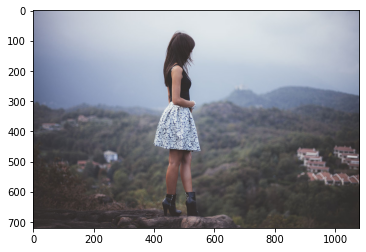

1/1 [==============================] - 1s 1s/step
모델 출력: 1.0
/content/hh_image_1.jpg는 사람입니다.
--------------------


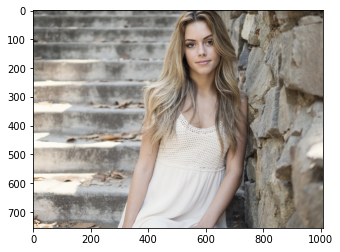

1/1 [==============================] - 0s 24ms/step
모델 출력: 1.0
/content/hh_image_2.jpg는 사람입니다.
--------------------


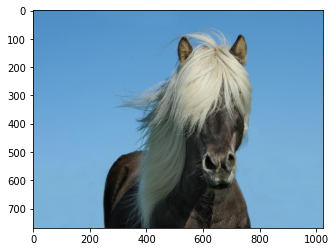

1/1 [==============================] - 0s 22ms/step
모델 출력: 1.0
/content/hh_image_3.jpg는 사람입니다.
--------------------


In [29]:
for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = image.load_img(fn, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    print('모델 출력:', classes[0][0])
    if classes[0][0] > 0.5:
        print(fn + "는 사람입니다.")
    else:
        print(fn + "는 말입니다.")
    print('--------------------')